In [1]:
# Import the neccessary modules for data manipulation and visual representation
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
#Read the analytics csv file and store our dataset into a dataframe called "df"
df = pd.read_csv('HR_comma_sep.csv', index_col=None)

## Data Cleaning

Typically, cleaning the data requires a lot of work and can be a very tedious procedure. This dataset from Kaggle is super clean and contains no missing values. But still, I will examine the dataset to make sure that everything else is readable and that the observation values match the feature names appropriately.

In [3]:
# Check to see if there are any missing values in our data set
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [4]:
# Get a quick overview of what we are dealing with in our dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# Renaming certain columns for better readability
df = df.rename(columns={ 'last_evaluation': 'evaluation',
                        'number_project': 'project_count',
                        'average_montly_hours': 'average_monthly_hours',
                        'time_spend_company': 'years_at_company',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

##### Feature Conversion
The purpose to converting the "salary" and "department" feature into numeric types is because when modeling, some functions cannot be performed on categorical variables.This will convert the "salary" feature into 3 numerical values and the "department" feature into 10 numerical values.

In [6]:
# Convert "department" and "salary" features to numeric types because some functions won't be able to work with string types
df['department'].replace(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
        'IT', 'product_mng', 'marketing', 'RandD'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], inplace = True)
df['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)

df.head()

,satisfaction_level,evaluation,project_count,average_monthly_hours,years_at_company,Work_accident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


##### Feature Arrangement
Something that I normally do for readability purposes is that I move my response variables all the way to the left side of the table. This allows me to see it quickly and it'll be easier to split the data set into training/testing sets.

In [7]:
# Move the reponse variable "turnover" to the front of the table
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)
df.head()

,turnover,satisfaction_level,evaluation,project_count,average_monthly_hours,years_at_company,Work_accident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,0,0
1,1,0.80,0.86,5,262,6,0,0,0,1
2,1,0.11,0.88,7,272,4,0,0,0,1
3,1,0.72,0.87,5,223,5,0,0,0,0
4,1,0.37,0.52,2,159,3,0,0,0,0


##### Outlier Detection
The describe functions allows you to see if there are any extreme values in your data by examining the min/max rows. There seems to be nothing irregular here.

In [8]:
df.describe()

,turnover,satisfaction_level,evaluation,project_count,average_monthly_hours,years_at_company,Work_accident,promotion,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,3.339823,0.594706
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,2.820837,0.637183
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,3.000000,1.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,6.000000,1.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,9.000000,2.000000


## Data Wrangling

In [9]:
# The dataset contains 10 columns and 14999 observations
df.shape

(14999, 10)

In [10]:
# Looks like about 76% of employees stayed and 24% of employees left. 
# NOTE: When performing cross validation, its important to maintain this turnover ratio
turnover_rate = df.turnover.value_counts() / 14999
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [11]:
# Overview of summary
# On average, employees who left had a lower satisfaction level of -20%**, worked 8hours more per month, 
# had lower salary, and had a lower promotion rate
turnover_Summary = df.groupby('turnover')
turnover_Summary.mean()

,satisfaction_level,evaluation,project_count,average_monthly_hours,years_at_company,Work_accident,promotion,department,salary
turnover,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,3.408908,0.650945
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,3.118734,0.414730


##### Correlation Matrix & Heatmap
Highly correlated features:
1. (+) projectCount & averageMonthlyHours & evaluation
2. (-) turnover & satisfaction & salary
From the heatmap, there seems to be heavy positive(+) correlation between projectCount, averageMonthlyHours, and evaluation. Which could mean that the employees who spent more hours and did more projects were evaluated highly. But the feature evaluation, when compared independently with the response variable turnover, shows little to no relationship. What does this mean? For the negative(-) relationships, turnover, satisfaction, and salary are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied and are lowly paid

,turnover,satisfaction_level,evaluation,project_count,average_monthly_hours,years_at_company,Work_accident,promotion,department,salary
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,-0.043814,-0.157898
satisfaction_level,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,0.015413,0.050022
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.011855,-0.013002
project_count,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.005577,-0.001803
average_monthly_hours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,-0.002387,-0.002242
years_at_company,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,-0.001611,0.048715
Work_accident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,0.019215,0.009247
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,0.015170,0.098119
department,-0.043814,0.015413,0.011855,0.005577,-0.002387,-0.001611,0.019215,0.015170,1.000000,0.033415
salary,-0.157898,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,0.098119,0.033415,1.000000


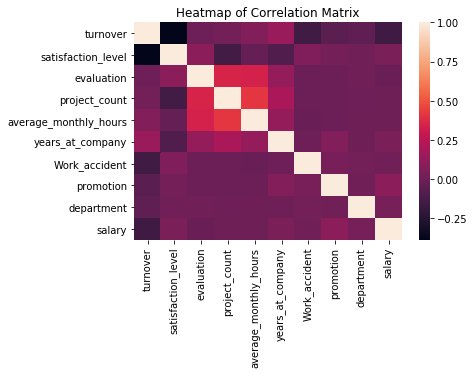

In [12]:
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
corr

##### Turnover V.S. Department
Looks like the top three departments for the company are support, technical, and sales. Most of the departments have similar turnover rates, but management has the lowest. This could mean that people with a higher position tend to not leave.

The management department has the highest salary ratio and lowest turnover rate.

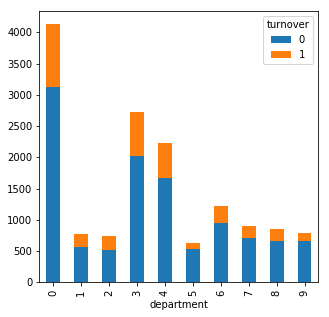

In [13]:
clarity_color_table = pd.crosstab(index=df["department"], 
                          columns=df["turnover"])

clarity_color_table.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

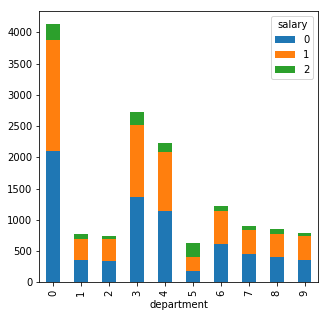

In [14]:
clarity_color_table = pd.crosstab(index=df["department"], 
                          columns=df["salary"])

clarity_color_table.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

##### Turnover V.S. Salary
This is a very interesting observation. Almost all of the employees who turnovered came from low to medium salary levels. Barely anybody that had a high salary left the company

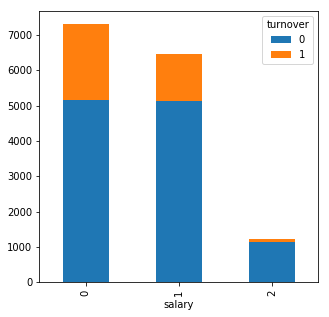

In [15]:
clarity_color_table = pd.crosstab(index=df["salary"], 
                          columns=df["turnover"])

clarity_color_table.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

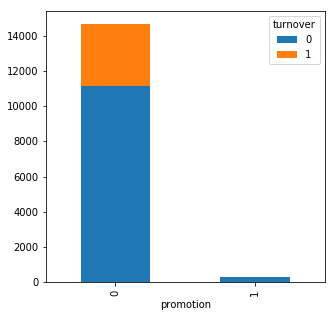

In [16]:
clarity_color_table = pd.crosstab(index=df["promotion"], 
                          columns=df["turnover"])

clarity_color_table.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

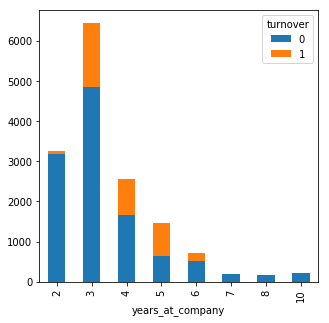

In [17]:
#YearsAtCompany   V.S.   Turnover
clarity_color_table = pd.crosstab(index=df["years_at_company"], 
                          columns=df["turnover"])

clarity_color_table.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

C:\Users\Dell\Anaconda3\envs\data-x\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


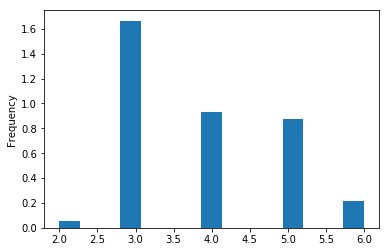

In [18]:
df.loc[(df['turnover'] == 1),'years_at_company'].plot(kind='hist', normed=1, bins=15, stacked=False, alpha=1)

##### Turnover V.S. ProjectCount
Summary: This graph is quite interesting as well. More than half of the employees that only had 2 projects left the company. Same can be said with employees who had project counts from 6-7. Maybe this means that employees with project counts 2 or less are not worked enough or are not highly valued, thus leaving the company? And maybe employees with 6+ projects are getting overworked, thus leaving the company?

It looks like a majority of the employes who left only had two projects. Also, you can see an increase in turnover as the number of projects increase. 3 Projects seems to be the sweet spot.

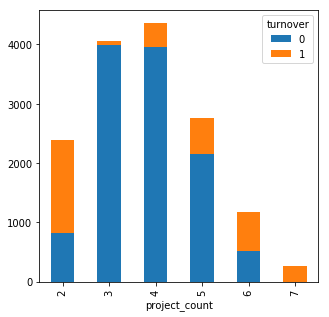

In [19]:
clarity_color_table = pd.crosstab(index=df["project_count"], 
                          columns=df["turnover"])

clarity_color_table.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

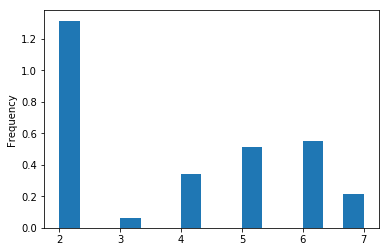

In [20]:
# Here is a histogram that shows the frequency of people who left the company and the amount of projects they had.
# It looks like a majority of the employes who left only had two projects
# Also, you can see an increase in turnover as the number of projects increase. 
# 3 Projects seems to be the sweet spot.
df.loc[(df['turnover'] == 1),'project_count'].plot(kind='hist', normed=1, bins=15, stacked=False, alpha=1)

##### Turnover V.S. Evaluation
There seems to be a biomodal distrubtion for those that had a turnover. It looks like employees who performed bad or performed well left the company. The sweet spot seems for those that stayed seems to be within 0.6-0.8.

Text(0.5,1,'Last evaluation')

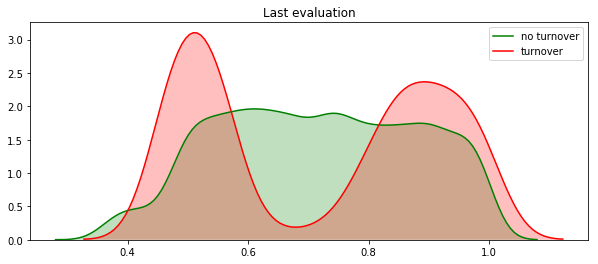

In [27]:
fig = plt.figure(figsize=(10,4),)
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='g',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
plt.title('Last evaluation')

##### Turnover V.S. AverageMonthlyHours
Another noticeable bi-modal distrubtion for employees that turnovered. It looks like employees who had less hours of work (150hours or less) and employees who had too many hours of work (~250 or more) left the company. Meaning that employees who left generally were not underworked or overworked.

Text(0.5,1,'Average monthly hours worked')

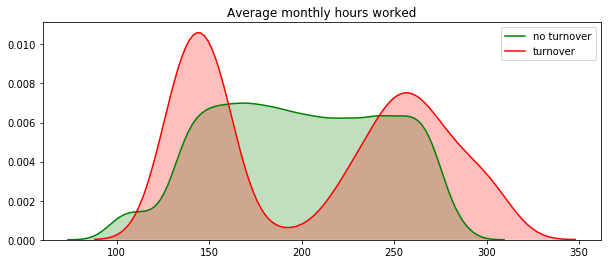

In [26]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(10,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'average_monthly_hours'] , color='g',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'average_monthly_hours'] , color='r',shade=True, label='turnover')
plt.title('Average monthly hours worked')

##### ProjectCount VS AverageMonthlyHours
Insight: Something weird about the boxplot graph is the difference in averageMonthlyHours between people who had a turnver and did not. Looks like employees who did not have a turnover had consistent averageMonthlyHours, despite the increase in projects. In contrast, employees who did have a turnover had an increase in averageMonthlyHours with the increase in projects.


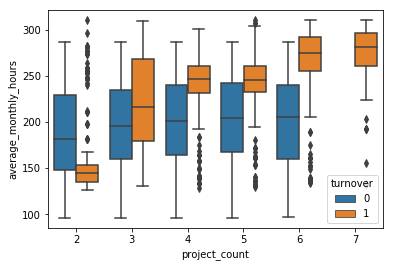

In [23]:
#ProjectCount VS AverageMonthlyHours [BOXPLOT]
#Looks like the average employees who stayed worked about 200hours/month. Those that had a turnover worked about 250hours/month and 150hours/month

sns.boxplot(x="project_count", y="average_monthly_hours", hue="turnover", data=df)

##### ProjectCount VS Evaluation
Insight: This graph looks very similar to the graph above. What I find strange with this graph is with the turnover group. There seems to be an increase in evaluation for employees who did more projects within the turnover group. But, again for the non-turnover group, employees here had a consistent evaluation score despite the increase in project counts.


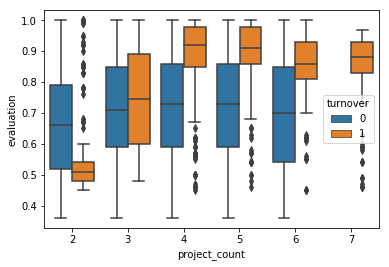

In [24]:
#Looks like employees who did not leave the company had an average evaluation of around 70% even with different projectCounts
#There is a huge skew in employees who had a turnover though. It drastically changes after 3 projectCounts. 
#Employees that had two projects and a horrible evaluation left. Employees with more than 3 projects and super high evaluations left

sns.boxplot(x="project_count", y="evaluation", hue="turnover", data=df)

##### ProjectCount VS Evaluation VS Satisfaction [SCATTER MATRIX]
Insight: On the bottom left hand corner of the matrix (Evaluation VS Satisfaction) From the scatter matrix, you can see that there are three distinct clusters for Evluation VS Satisfaction.

Cluster 1: Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but felt horrible at their job. What could be the reason for feeling so horrible when you are highly evaluated? Could it be working too hard? Could this cluster mean employees who are "overworked"?

Cluster 2: Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work. Which could mean that employees in this cluster were not performing as well and felt bad. Could this cluster mean employees who "under-performed"?

Cluster 3: Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance. Maybe employees in this category left because they found another job opportunity?

C:\Users\Dell\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000213BCC96988>,
      dtype=object)

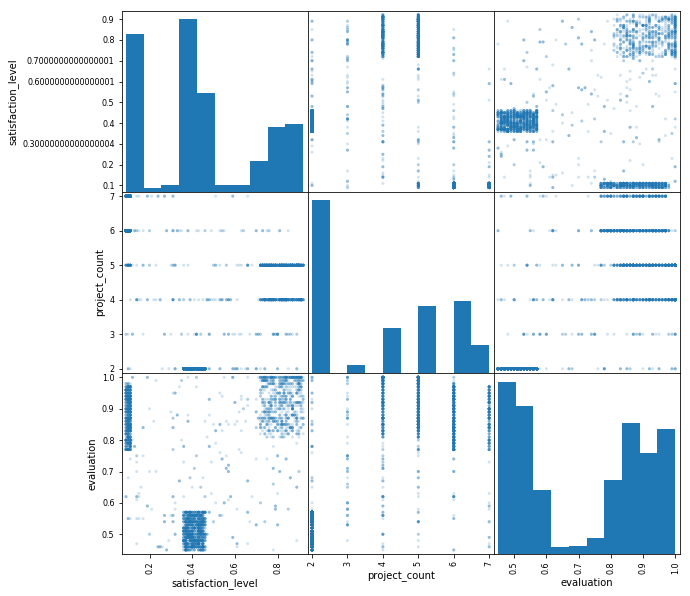

In [25]:
# SCATTER MATRIX FOR EMPLOYEES WHO TURNOVER
fig, ax = plt.subplots(figsize=(10,10))
turnoverDF = df[df['turnover']==1]
scatter_matrix(turnoverDF[['satisfaction_level','project_count','evaluation']], alpha=0.2, diagonal='hist', ax=ax)